In [7]:
import numpy as np
import matplotlib.pyplot as plt
from Euler_1stOrderForward import getEulerBOLD
from signal_pytorch import csd
import torch
import scipy

# t1, final_y_1 = getEulerBOLD(sigma=0.4, mu=1.0, lamb=0.4, beta=1.0, phi=0.4, psi=0.4, chi=0.4, noise=True, length=1000)
# final_y_1 = torch.stack(final_y_1)


# t1, final_y_2 = getEulerBOLD(sigma=2.0, mu=3.0, lamb=0.8, beta=0.8, phi=0.8, psi=0.8, chi=0.8, noise=True, length=1000)
# final_y_2 = torch.stack(final_y_2)
# plt.plot(torch.fft.fftshift(f), torch.fft.fftshift(csdx1), label="beta=0.2")

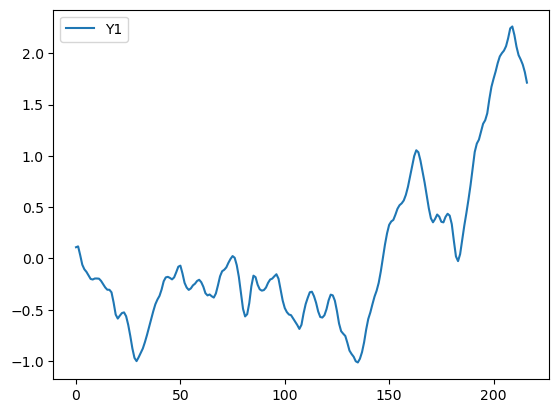

In [3]:
y1 = final_y_1[5000:]
y1 = y1/y1.std()
y2 = final_y_2[5000:]
y2 = y2/y2.std()
plt.plot(y1.detach()[::200][-217:], label='Y1')
plt.legend()

In [32]:
observed_bold = np.loadtxt('/rds/general/user/ak1920/home/fyp/fyp/time_series/sub-001-PLCB-ROI52.txt' , delimiter=',')
observed_bold = torch.from_numpy(observed_bold)
observed_bold = observed_bold / observed_bold.std()

Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False


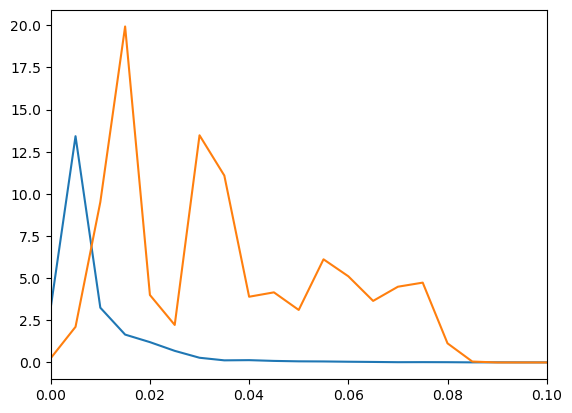

In [38]:
f1,p1 = csd(y1, y1, fs=100, nperseg=20000)
f2,p2 = csd(y2, y2, fs=100, nperseg=20000)
fo, po = csd(observed_bold, observed_bold, fs=0.5, nperseg = 100)
f1 = torch.fft.fftshift(f1)
p1 = torch.fft.fftshift(p1)
fo = torch.fft.fftshift(fo)
po = torch.fft.fftshift(po)
freq_range = 0.1


mask_f1 = torch.isin(f1, fo)
p1_ds = p1[mask_f1]


plt.xlim(0, 0.1)
plt.plot(fo.detach(), p1_ds.detach())
plt.plot(fo.detach(), po.detach())


ValueError: x and y must have same first dimension, but have shapes torch.Size([8]) and torch.Size([21])

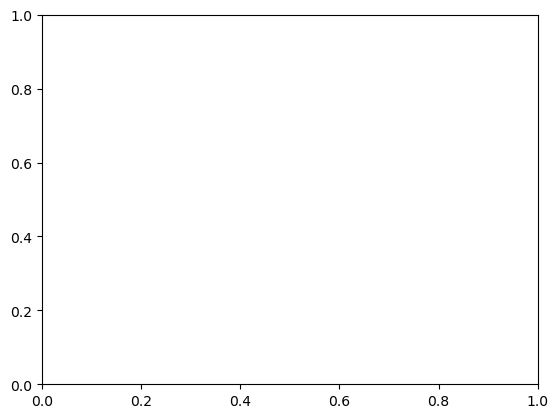

In [64]:
# plt.plot(f1.detach(),p1.detach() * 7, label='simulated')
plt.plot(f1_positive.detach(), p1_downsampled.detach(), label='downsampled after')
# plt.plot(f2.detach(),p2.detach() * 7, label='simulated')
# plt.plot(f.detach(), csd2.detach(), label='downsampled after')
plt.plot(fo_positive.detach(),po_downsampled.detach(), label='observed')
plt.legend()
plt.xlim(0, 0.1)
plt.grid()

(0.0, 0.1)

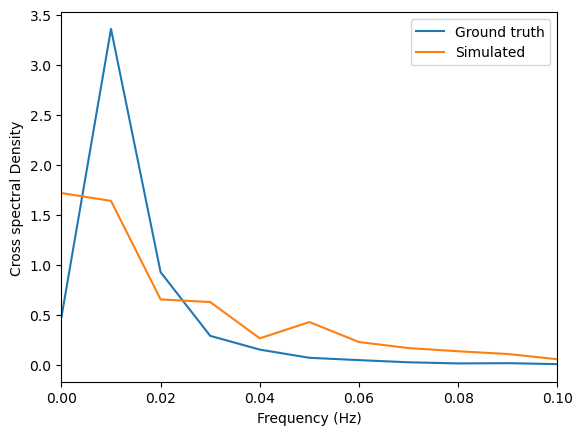

In [47]:
import scipy


# t1, final_y_1 = getEulerBOLD(sigma=0.504, noise=True, length=1000)
# final_y_1 = torch.stack(final_y_1)
# y1 = final_y_1/final_y_1.std()
# f1,p1 = csd(y1, y1, fs=100, nperseg=10000)
# f1, p1 = torch.fft.fftshift(f1), torch.fft.fftshift(p1)
# plt.plot(f1.detach(), p1.detach(), label='Simulated')



# t1, final_y_1 = getEulerBOLD(noise=True, length=1000)
# final_y_1 = torch.stack(final_y_1)
# y1 = final_y_1/final_y_1.std()
# f1,p1 = csd(y1, y1, fs=100, nperseg=10000)
# f1, p1 = torch.fft.fftshift(f1), torch.fft.fftshift(p1)
plt.plot(f1.detach(),p1.detach(), label='Ground truth')

sp = np.loadtxt("final_spectrum_simulated.txt", delimiter=',', dtype=complex)
plt.plot(f1, scipy.fft.fftshift(sp), label='Simulated')

# plt.plot(f1.detach(),p1.detach() * 7, label='simulated')

# plt.plot(f2.detach(),p2.detach() * 7, label='simulated')
# plt.plot(f.detach(), csd2.detach(), label='downsampled after')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Cross spectral Density")
plt.legend()
plt.xlim(0, 0.1)

In [56]:
p1.shape

torch.Size([7100])

In [57]:
po.shape

torch.Size([100])

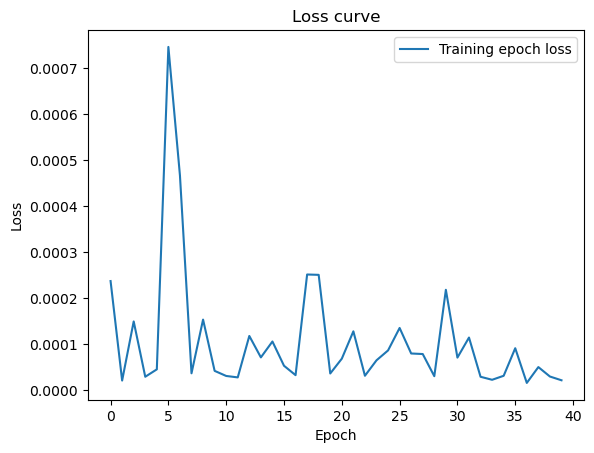

In [2]:
import json

# Read JSON file
with open("losses-simulated.json", 'r') as json_file:
    losses = json.load(json_file)


epochs = np.arange(len(losses))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss curve')
plt.plot(epochs, losses, label='Training epoch loss')
plt.legend()
plt.show()

Input data is complex, switching to return_onesided=False


Text(0, 0.5, 'Cross spectral density')

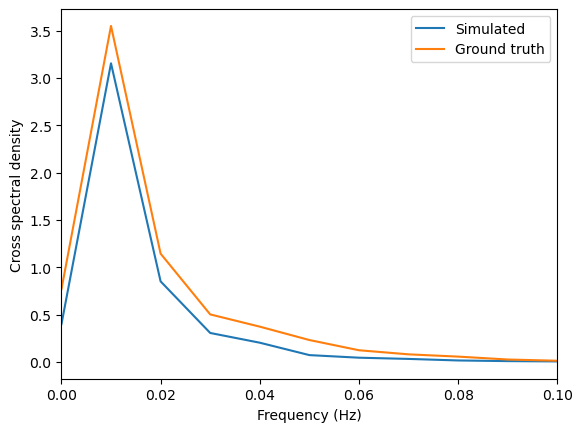

In [12]:
# _, y0 = getEulerBOLD(noise=True, length=1000)
# y0 = torch.stack(y0)
# y0 = y0 / torch.std(y0)
f2, csdy = csd(y0, y0, fs=100, nperseg = 10000)

csdx = np.loadtxt("final_spectrum_simulated.txt", delimiter=',', dtype=complex)

f2 = torch.fft.fftshift(f2)
csdy = torch.fft.fftshift(csdy)
csdx = scipy.fft.fftshift(csdx)

plt.plot(f2.detach(), csdx, label="Simulated")
plt.plot(f2.detach(), csdy.detach(), label="Ground truth")
# sp = np.loadtxt("final_spectrum_sub-001-LSD-ROI2.txt", delimiter=',', dtype=complex)
# plt.plot(fo, sp)
# plt.plot(fo, po)
plt.xlim(0, 0.1)
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Cross spectral density")


# sigma=0.5, mu=0.4, lamb=0.2, c=0.25,
#                  psi=0.6, phi=1.5, chi=0.6,
    
# y = torch.stack(y)
# y = y / torch.std(y)
# f1, csdx = csd(y, y, fs=100, nperseg = 10000)
# _, y0 = getEulerBOLD(noise=True, length=1000)
# y0 = torch.stack(y0)
# y0 = y0 / torch.std(y0)
# f2, csdy = csd(y0, y0, fs=100, nperseg = 10000)

# # sp = np.loadtxt("final_spectrum_simulated.txt", delimiter=',', dtype=complex)
# plt.plot(f1.detach(), csdx.detach())
# plt.plot(f2.detach(), csdy.detach())
# # sp = np.loadtxt("final_spectrum_sub-001-LSD-ROI2.txt", delimiter=',', dtype=complex)
# # plt.plot(fo, sp)
# # plt.plot(fo, po)
# plt.xlim(0, 0.1)